In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [55]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [56]:
data = pd.read_csv('data.csv')

In [57]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [59]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [60]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [61]:
data.shape

(4600, 18)

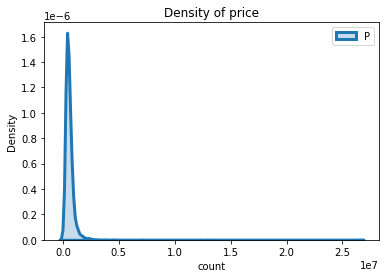

In [62]:
import warnings
  

warnings.filterwarnings('ignore')
sns.distplot(data['price'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel("count")
plt.ylabel("Density")
plt.title("Density of price")
plt.legend("Price")
plt.show()

Text(0, 0.5, 'Density')

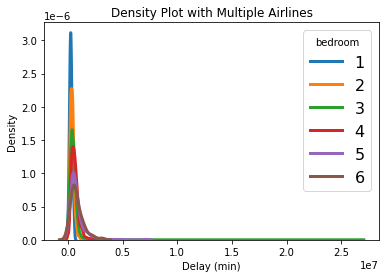

In [63]:
bed=[1,2,3,4,5,6]
# Iterate through the five airlines
for i in bed:
    # Subset to the airline
    subset = data[data['bedrooms'] == i]
    
    # Draw the density plot
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'bedroom')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [64]:
bedrooms=data['bedrooms'].value_counts()
bedrooms

import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`

fig = px.pie(data, values='price', names='bedrooms')
fig.show()

In [65]:
new_data=data.copy()
new_data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [66]:
new_data=new_data.drop(['date','street','statezip'],axis=1)

In [67]:
print(" new shape of datasets",new_data.shape)
new_data.head()

b=(new_data.columns)

 new shape of datasets (4600, 15)


In [68]:
new_data['city']=pd.factorize(new_data['city'])[0]
new_data['country']=pd.factorize(new_data['city'])[0]

In [69]:
from sklearn.preprocessing import StandardScaler


a=StandardScaler()


new_data=a.fit_transform(new_data)


new_data=pd.DataFrame(new_data,columns=b)#with the help of the pandas converted into the dataframe 


new_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.932857,-0.932857
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,-0.823706,-0.823706
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.714556,-0.714556
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-0.605405,-0.605405
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,-0.496255,-0.496255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.432437,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121,-0.823706,-0.823706
4596,-0.031271,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755,-0.605405,-0.605405
4597,-0.239562,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693,1.031852,1.031852
4598,-0.618268,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693,-0.823706,-0.823706


In [70]:
x=new_data.drop('price',axis=1)
y=new_data[['price']]

In [71]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y)

# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()  
slr.fit(x_train, y_train)


y_pred= slr.predict(x_test)

y_pred.shape
y_test.shape

(1150, 1)

In [73]:
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  [-0.00092436]
Coefficient:  [[-0.08138697  0.06716327  0.2226924  -0.03072204  0.02781719  0.07669717
   0.06673508  0.05029957  0.20597536  0.07953099 -0.09703594  0.0019347
  -0.03134367 -0.03134367]]


In [74]:
slr.score(x_test,y_test)

0.2744278903060289

# Polynomial Regression

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
#train  data according to the  polynimial feature 
poly_reg.fit(x_train)
#transform the data
train_poly=poly_reg.transform(x_train)
test_poly=poly_reg.transform(x_test)

In [76]:
slr.fit(train_poly,y_train)
slr.score(test_poly,y_test)

0.2670137555196199

# Support Vector Machine

In [77]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
yt = lab.fit_transform(y_train)


yt1 = lab.fit_transform(y_test)
#view transformed values
#print(y_transformed)

print(yt.shape)
print(x_train.shape)


from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(x_train,y_train)
print(svr_rbf.score(x_test,y_test))

(3450,)
(3450, 14)
0.21129074101951817


# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(x_train, y_train)


regressor.score(x_test, y_test)

-4.103438666642298

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
 
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)



regr.score(x_test, y_test)

0.20653860378934397

# KNeighbors Regression

In [80]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
   # print('RMSE value for k= ' , K , 'is:', error)

<AxesSubplot:>

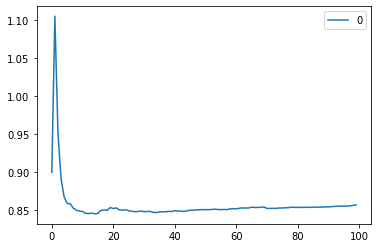

In [81]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [82]:
model.score(x_test,y_test)

0.20153353264687113

In [83]:
model = neighbors.KNeighborsRegressor(n_neighbors = 65)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.20887922939249992

In [88]:
y_pred = model.predict(x_test)

In [89]:
y_pred.shape

(1150, 1)

In [90]:
y_pred

array([[-0.22824327],
       [-0.2712685 ],
       [-0.17534347],
       ...,
       [ 0.03089672],
       [ 0.12278904],
       [ 0.12186658]])

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [92]:
mean_squared_error(y_test,y_pred)

0.7273903894012258

In [93]:
mean_absolute_error(y_test, y_pred)

0.32306457547734785

In [94]:
r2_score(y_test, y_pred)

0.20887922939249992